Dataset Shape: (8807, 12)

Column Names: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Missing values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


C:\Users\Shobith\AppData\Local\Temp\ipykernel_31004\707984321.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


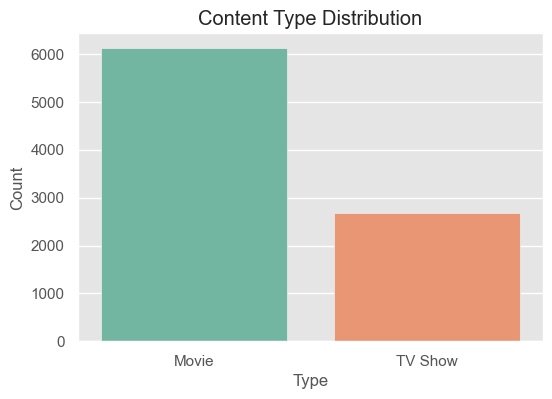

C:\Users\Shobith\AppData\Local\Temp\ipykernel_31004\707984321.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


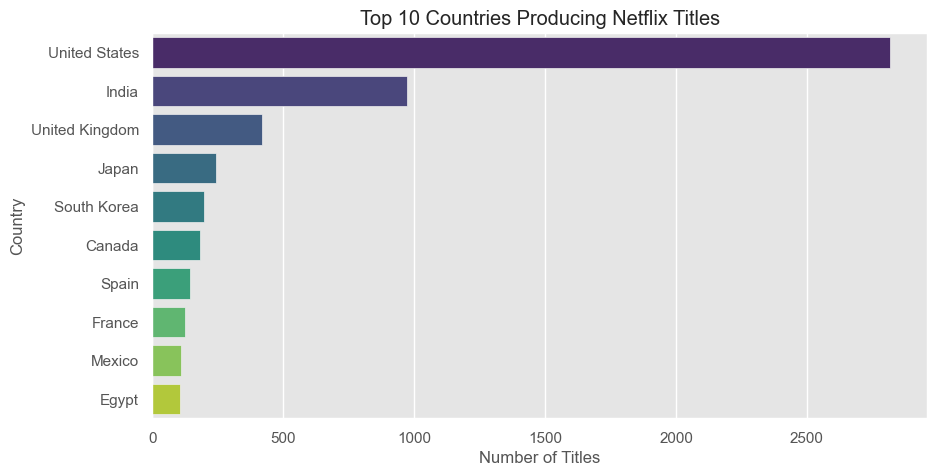

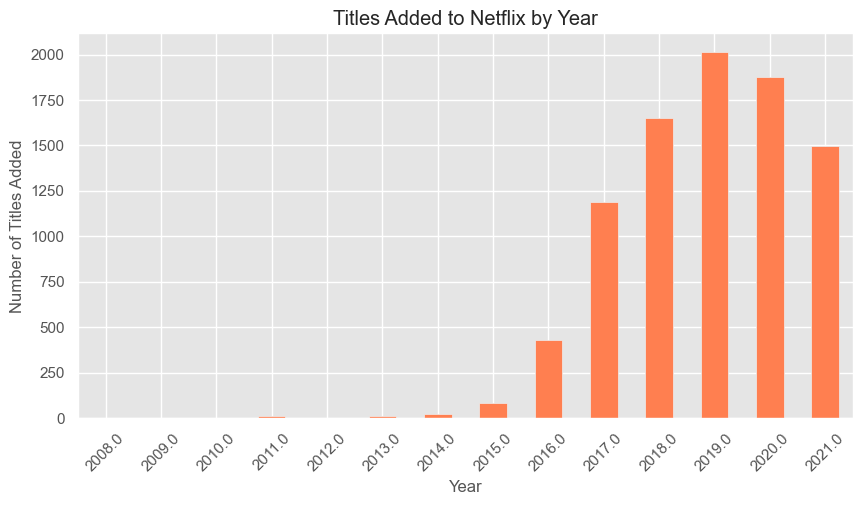

Install wordcloud library to view genre visualization.


C:\Users\Shobith\AppData\Local\Temp\ipykernel_31004\707984321.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='duration_int', data=df, palette='coolwarm')


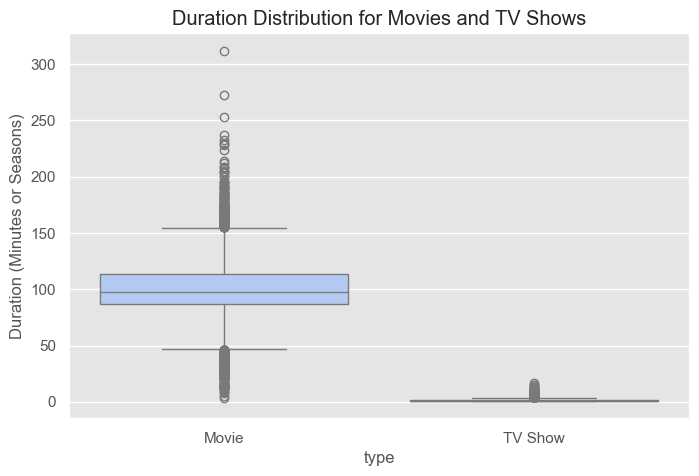

C:\Users\Shobith\AppData\Local\Temp\ipykernel_31004\707984321.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')


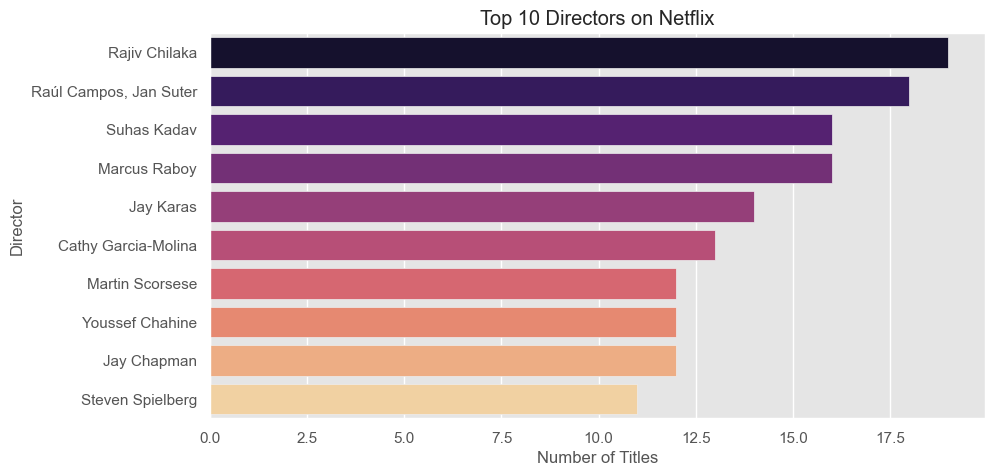

C:\Users\Shobith\AppData\Local\Temp\ipykernel_31004\707984321.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='Set3')


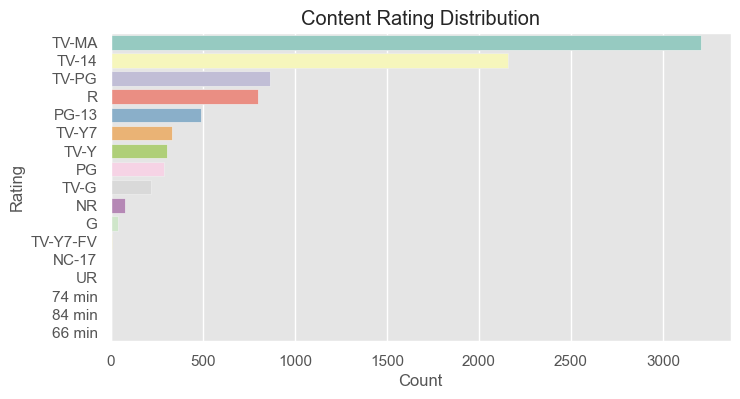

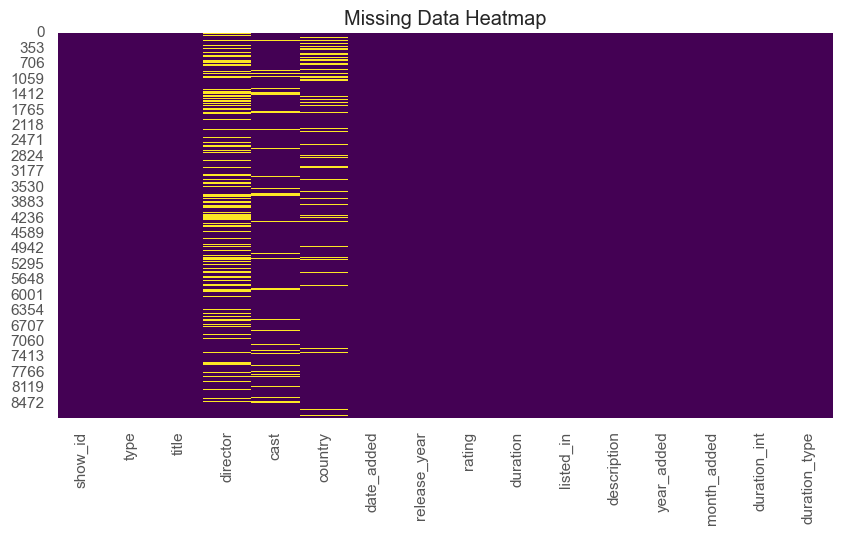

In [6]:
# Netflix Data Analysis Project Notebook

# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plots
%matplotlib inline

# 2. Load dataset
df = pd.read_csv('netflix_titles.csv')

# 3. Show basic info
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
df.head()

# 4. Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# 5. Clean 'date_added' column
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# 6. Create new columns from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# 7. Count of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# 8. Top 10 Countries with Most Titles
plt.figure(figsize=(10,5))
df['country'].dropna(inplace=True)
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries Producing Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

# 9. Number of Titles Added per Year
plt.figure(figsize=(10,5))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='coral')
plt.title('Titles Added to Netflix by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.show()

# 10. Genre (Listed_in) Word Cloud (optional if wordcloud installed)
try:
    from wordcloud import WordCloud, STOPWORDS
    text = ' '.join(df['listed_in'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Genres Word Cloud')
    plt.show()
except ImportError:
    print("Install wordcloud library to view genre visualization.")

# 11. Duration Analysis (Movies vs TV Shows)
# Convert duration column
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')

plt.figure(figsize=(8,5))
sns.boxplot(x='type', y='duration_int', data=df, palette='coolwarm')
plt.title('Duration Distribution for Movies and TV Shows')
plt.ylabel('Duration (Minutes or Seasons)')
plt.show()

# 12. Top 10 Directors
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

# 13. Content Rating Distribution
plt.figure(figsize=(8,4))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='Set3')
plt.title('Content Rating Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

# 14. Heatmap of Missing Data
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()
